Membaca Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/justraven/alpha-guess-ml/main/data/dataset/02_Merged_alpha.csv')
df.head()

,Alpha,X_Acc,Y_Acc,Z_Acc,X_Gyro,Y_Gyro,Z_Gyro
0,A,-0.34,0.08,1.18,39.43,-46.63,4.64
1,A,-0.29,0.15,1.28,22.34,2.14,-6.71
2,A,-0.13,0.30,1.17,23.62,21.61,-9.95
3,A,-0.17,0.33,1.37,65.37,25.94,-22.22
4,A,-0.11,0.17,1.29,71.41,70.56,-26.92


Melihat statistical details

In [ ]:
df.describe()

,X_Acc,Y_Acc,Z_Acc,X_Gyro,Y_Gyro,Z_Gyro
count,4802.000000,4802.000000,4802.000000,4802.000000,4802.00000,4802.000000
mean,0.115173,0.044175,0.928909,1.765883,-3.80642,-2.704885
std,0.270610,0.318929,0.419067,25.733202,91.61953,52.521280
min,-0.840000,-1.060000,-0.530000,-170.100000,-421.26000,-226.140000
25%,-0.060000,-0.130000,0.670000,-11.645000,-47.21000,-32.455000
50%,0.150000,0.050000,0.920000,3.300000,-0.64000,-4.270000
75%,0.310000,0.220000,1.160000,17.030000,53.16000,22.205000
max,0.810000,1.950000,2.670000,186.460000,301.21000,273.620000


check presentase target class

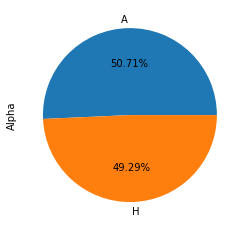

In [ ]:
import matplotlib.pyplot as plt

data = df['Alpha'].value_counts()
data.plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

Check Histogram for continous columns

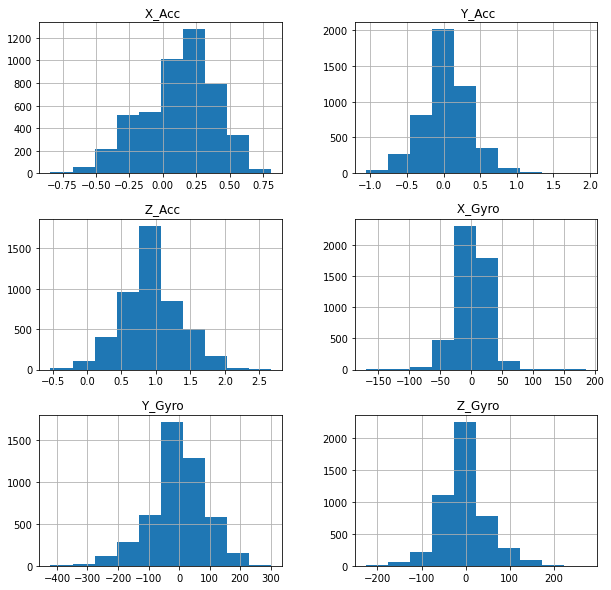

In [ ]:
df.hist(figsize=(10,10))
plt.show()

Check correlation coeficient

In [ ]:
df.corr()

,X_Acc,Y_Acc,Z_Acc,X_Gyro,Y_Gyro,Z_Gyro
X_Acc,1.000000,-0.355276,0.615018,-0.068302,-0.113086,-0.093447
Y_Acc,-0.355276,1.000000,-0.051006,-0.050153,-0.105429,0.088548
Z_Acc,0.615018,-0.051006,1.000000,0.018855,-0.017849,-0.113758
X_Gyro,-0.068302,-0.050153,0.018855,1.000000,0.437270,0.243741
Y_Gyro,-0.113086,-0.105429,-0.017849,0.437270,1.000000,-0.171796
Z_Gyro,-0.093447,0.088548,-0.113758,0.243741,-0.171796,1.000000


Check missing values

In [ ]:
df.isnull().sum()

Alpha      0
 X_Acc     0
 Y_Acc     0
 Z_Acc     0
 X_Gyro    0
 Y_Gyro    0
 Z_Gyro    0
dtype: int64

Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


df_X = df.drop(['Alpha'],axis = 1)
df_Y = df[['Alpha']]

le = LabelEncoder()
df_Y = le.fit_transform(df_Y['Alpha'])

X = df_X.astype(float).values
Y = df_Y.astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('X = ',X)
print()
print('Y = ',Y)
print()
print('X Train = ',X_train)
print()
print('X test = ' ,X_test)

X =  [[ -0.34   0.08   1.18  39.43 -46.63   4.64]
 [ -0.29   0.15   1.28  22.34   2.14  -6.71]
 [ -0.13   0.3    1.17  23.62  21.61  -9.95]
 ...
 [ -0.25   0.17   0.91  -0.61  -3.97  17.82]
 [ -0.26   0.25   1.     7.75  -8.79   6.35]
 [ -0.25   0.14   0.97   6.29  -5.8   -2.93]]

Y =  [0. 0. 0. ... 1. 1. 1.]

X Train =  [[-1.03077693 -0.382756    0.18133636  0.12653421 -0.06923412 -0.02460452]
 [-1.32759653  1.01366263 -0.31731566  0.37261921 -1.69060601  0.83412673]
 [-0.69685488 -0.0103777  -1.50458237  1.0549811   1.02967391 -0.40490783]
 ...
 [-1.03077693  0.29993756 -0.412297   -0.2076601  -1.08351849 -0.28107942]
 [-1.69862103  0.64128433  0.30006303 -0.50614491  0.79543213  0.34406642]
 [ 0.71303822 -1.93433225 -0.36480633  1.43885818  0.22433147  1.72512841]]

X test =  [[-0.84526468 -0.28966142 -1.29087436 -0.02523115 -0.71547099  0.02680303]
 [ 1.12116517  0.08271688  1.20238573 -1.22615702 -0.12779456 -0.0692578 ]
 [-0.32583038  0.95159958  0.06260969 -0.47548132 -0.0325929

Modelling Logistic Regression

Accuracy 	=  0.6960444136016655
Precision 	=  0.6972518457752256
Recall 		=  0.6946670830297352
Confusion Matrix =  [[553 186]
 [252 450]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


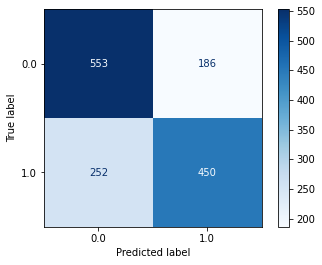

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('Accuracy \t= ',accuracy_score(Y_test, Y_pred))
print('Precision \t= ',precision_score(Y_test,Y_pred,average = 'macro'))
print('Recall \t\t= ',recall_score(Y_test,Y_pred,average = 'macro'))

print('Confusion Matrix = ',confusion_matrix(Y_test,Y_pred))

plot_confusion_matrix(model, X_test, Y_test, cmap = plt.cm.Blues)
plt.show()